## Problem 3

In [222]:
import pandas as pd
data = pd.read_csv('data_assignment3.csv')
data.head()

,city,treatment_person,treatment_city,treatment_twostage,revenue_person,revenue_city,revenue_twostage
0,atlanta,0,0,1,27.454834,27.454834,30.054834
1,atlanta,0,0,1,15.374318,15.374318,17.974318
2,atlanta,0,0,1,23.229566,23.229566,25.829566
3,atlanta,0,0,1,7.713634,7.713634,10.313634
4,atlanta,0,0,1,12.333270,12.333270,14.933270


In [223]:
data.shape

(36000, 7)

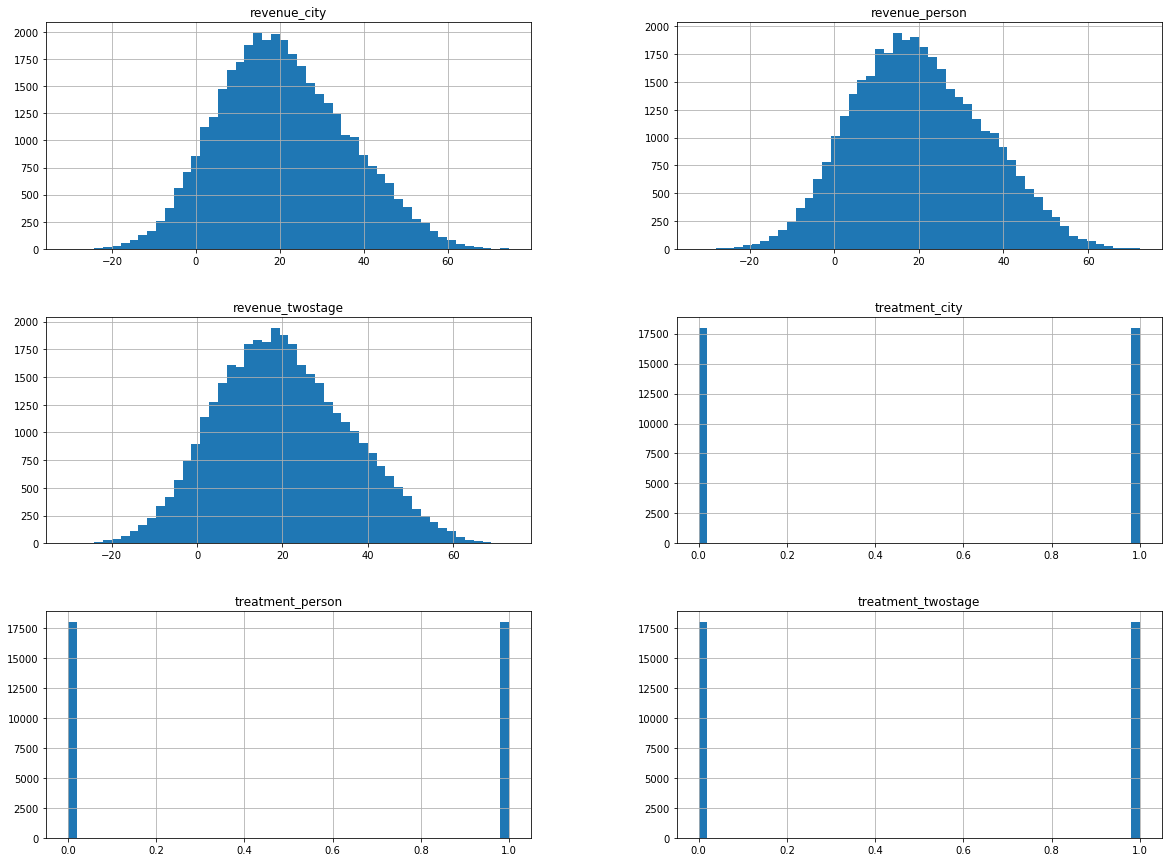

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

In [225]:
data.isna().sum()

city                  0
treatment_person      0
treatment_city        0
treatment_twostage    0
revenue_person        0
revenue_city          0
revenue_twostage      0
dtype: int64

In [226]:
data.isnull().sum()

city                  0
treatment_person      0
treatment_city        0
treatment_twostage    0
revenue_person        0
revenue_city          0
revenue_twostage      0
dtype: int64

In [227]:
#q.1
import numpy as np
y = data.revenue_person
t = data.treatment_person

effect = y[np.where(t == 1)[0]].mean() - y[np.where(t == 0)[0]].mean()
effect

3.4818867473731245

In [228]:
std_t_sq = y[np.where(t == 1)[0]].std()**2 
std_c_sq = y[np.where(t == 0)[0]].std()**2

n_t = t.value_counts()[1]
n_c = t.value_counts()[0]
#Formula
st_error = np.sqrt(std_t_sq/n_t + std_c_sq/n_c)
print("Standard Error (analytical tool): " + str(round(st_error, 3)))

Standard Error (analytical tool): 0.162


In [229]:
#bootstrap
np.random.seed(123)
samples1 = []
for i in range(1000):
    treatment_mean = y[np.random.choice(np.where(t == 1)[0], 
    len(np.where(t == 1)[0]), replace = True)].mean()
    control_mean = y[np.random.choice(np.where(t == 0)[0], 
    len(np.where(t == 0)[0]), replace = True)].mean()
    samples1.append(treatment_mean - control_mean)

print("Standard Error by bootstrapping: " + str(round(np.std(samples1), 3)))
print("Treatment effect by bootstrapping: " + str(round(np.mean(samples1), 3)))

Standard Error by bootstrapping: 0.166
Treatment effect by bootstrapping: 3.482


In [101]:
#q.2
np.random.seed(12)
data1 = data.groupby(data.city).mean()
y1 = data1.revenue_city
t1 = data1.treatment_city

#bootstrap
samples2 = []
for i in range(1000):
    treatment_mean = y1[np.random.choice(np.where(t1 == 1)[0], 
    len(np.where(t1 == 1)[0]), replace = True)].mean()
    control_mean = y1[np.random.choice(np.where(t1 == 0)[0], 
    len(np.where(t1 == 0)[0]), replace = True)].mean()
    samples2.append(treatment_mean - control_mean)

print("Standard Error (city) by bootstrapping: " + str(round(np.std(samples2), 3)))
print("Treatment effect (city) by bootstrapping: " + str(round(np.mean(samples2), 3)))

Standard Error (city) by bootstrapping: 3.985
Treatment effect (city) by bootstrapping: 1.347


In [100]:
#data1 = data.groupby(data.city).mean()
#data1

,treatment_person,treatment_city,treatment_twostage,revenue_person,revenue_city,revenue_twostage,city_num
city,,,,,,,
atlanta,0.446,0.0,0.2,20.268303,18.707303,19.227303,0.0
austin,0.503,0.0,0.3,29.673908,27.913408,28.783408,1.0
baltimore,0.527,0.0,0.1,4.949960,3.105460,3.335460,2.0
boston,0.493,1.0,0.3,19.787362,23.061862,18.931862,3.0
charlotte,0.492,1.0,0.2,4.350355,7.628355,3.148355,4.0
chicago,0.506,1.0,0.2,5.245670,8.474670,3.994670,5.0
columbus,0.481,1.0,0.4,12.928117,16.244617,12.524617,6.0
dallas,0.495,0.0,0.4,23.026637,21.294137,22.574137,7.0
denver,0.494,0.0,0.6,21.474496,19.745496,22.025496,8.0


In [40]:
data.city.groupby(data.treatment_city).value_counts()

treatment_city  city        
0               atlanta         1000
                austin          1000
                baltimore       1000
                dallas          1000
                denver          1000
                fresno          1000
                houston         1000
                jacksonville    1000
                memphis         1000
                milwaukee       1000
                minneapolis     1000
                nashville       1000
                phoenix         1000
                portland        1000
                sandiego        1000
                sanfrancisco    1000
                sanjose         1000
                washingtondc    1000
1               boston          1000
                charlotte       1000
                chicago         1000
                columbus        1000
                detroit         1000
                elpaso          1000
                kansascity      1000
                lasvegas        1000
         

In [41]:
#city-level randomization), you randomize  entire  cities:  all  1,000  users  
#in  each  city  are  all  given  treatment,  or  all  1,000  users  are  kepton control.

#q.3 
In terms of bias and variance we are not able to assess bias here due to the absense of the true value. At the same time, we can compare standard errors. We can make a conclusion that city-level randomization has higher variance than the individual-level (0.166 and 3.985 respectively). We can assume that theoretically the treatment effect estimate of the individual-level experiment should be more biased, in comparison with city-level. 

In [230]:
#q.4
data.city.groupby(data.treatment_twostage).value_counts()

treatment_twostage  city        
0                   baltimore       900
                    fresno          900
                    seattle         900
                    washingtondc    900
                    atlanta         800
                                   ... 
1                   portland        200
                    baltimore       100
                    fresno          100
                    seattle         100
                    washingtondc    100
Name: city, Length: 72, dtype: int64

In [43]:
#there are 36 cities. Two-stage randomization: 
#1) treatment/control split for each city. 
#F.e., baltimore will have 900 people in the control group and 100 in the treatment (10/90 split)
#2) randomly assign people to the treatement and the control groups in each city using also current split

In [44]:
data.treatment_twostage

0        1
1        1
2        1
3        1
4        1
        ..
35995    0
35996    0
35997    0
35998    0
35999    0
Name: treatment_twostage, Length: 36000, dtype: int64

In [46]:
data.city.unique()

array(['atlanta', 'austin', 'baltimore', 'boston', 'charlotte', 'chicago',
       'columbus', 'dallas', 'denver', 'detroit', 'elpaso', 'fresno',
       'houston', 'jacksonville', 'kansascity', 'lasvegas', 'losangeles',
       'louisville', 'memphis', 'miami', 'milwaukee', 'minneapolis',
       'nashville', 'newyork', 'oklahomacity', 'omaha', 'philadelphia',
       'phoenix', 'portland', 'sanantonio', 'sandiego', 'sanfrancisco',
       'sanjose', 'seattle', 'tampa', 'washingtondc'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['city_num'] = labelencoder.fit_transform(data['city'])
data

,city,treatment_person,treatment_city,treatment_twostage,revenue_person,revenue_city,revenue_twostage,city_num
0,atlanta,0,0,1,27.454834,27.454834,30.054834,0
1,atlanta,0,0,1,15.374318,15.374318,17.974318,0
2,atlanta,0,0,1,23.229566,23.229566,25.829566,0
3,atlanta,0,0,1,7.713634,7.713634,10.313634,0
4,atlanta,0,0,1,12.333270,12.333270,14.933270,0
...,...,...,...,...,...,...,...,...
35995,washingtondc,1,0,0,-6.146015,-9.646015,-9.646015,35
35996,washingtondc,0,0,0,1.720192,1.720192,1.720192,35
35997,washingtondc,1,0,0,18.329072,14.829072,14.829072,35
35998,washingtondc,1,0,0,23.982405,20.482405,20.482405,35


In [53]:
len(data.city_num.unique())

36

In [58]:
len(samples2)

1000

In [165]:
#q.4 (a)
y2 = data.revenue_twostage
t2 = data.treatment_twostage
np.random.seed(3)
#bootstrap
samples3 = []
samples = []

for c in range(len(data.city_num.unique())): 
    for i in range(1000):
        treatment_mean = y2[np.random.choice(np.where(t2[data.city_num == c] == 1)[0],
                                                                       len(np.where(
                                                                           t2[data.city_num == c] == 1)[0]),
                                                                       replace = True)].mean()
        control_mean = y2[np.random.choice(np.where(t2[data.city_num == c] == 0)[0],
                                                                     len(np.where(
                                                                         t2[data.city_num == c] == 0)[0]),
                                                                     replace = True)].mean()
        samples3.append(treatment_mean - control_mean)
    te = np.mean(samples3)
    samples3.clear()
    samples.append(te)
    del te

Text(0, 0.5, 'Treatment Effect')

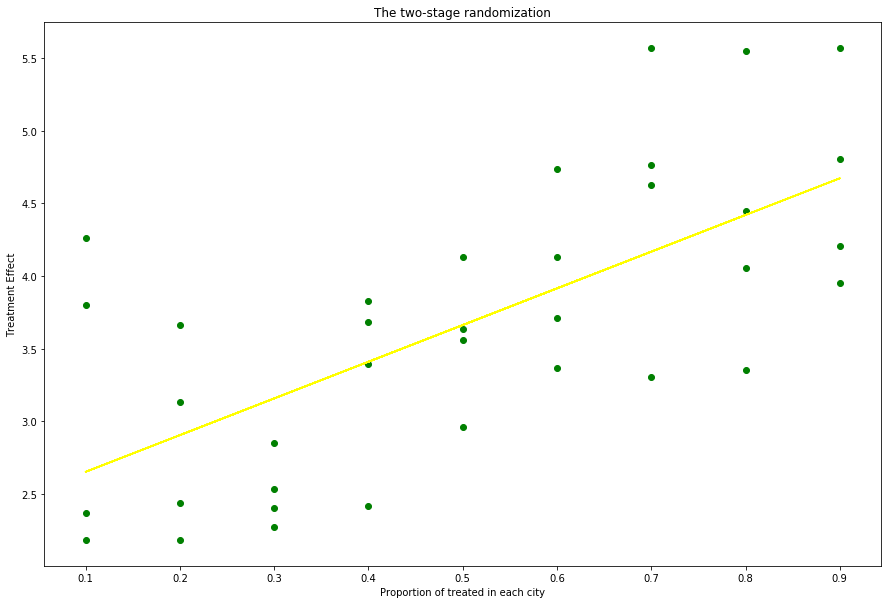

In [231]:
#w/o bootstrap
prop = data.treatment_twostage.groupby(data.city).mean().tolist() #proportion
city_prop = data.groupby([data.city, data.treatment_twostage]).mean() #new df with two interested columns
list3 = []
for c in data.city.unique():
    list3.append(city_prop.revenue_twostage[c][1] - city_prop.revenue_twostage[c][0])
df_ts = pd.DataFrame(list(zip(list3, prop)), columns = ['treatment_effect', 'treatment_prop'])

k, b = np.polyfit(df_ts['treatment_prop'], df_ts['treatment_effect'], 1) #the fitted line
plt.figure(figsize = (15,10))
plt.scatter(df_ts['treatment_prop'], df_ts['treatment_effect'], color = 'green')
plt.plot(df_ts['treatment_prop'], k*df_ts['treatment_prop'] + b, color = 'yellow')
plt.title('The two-stage randomization')
plt.xlabel('Proportion of treated in each city')
plt.ylabel('Treatment Effect')

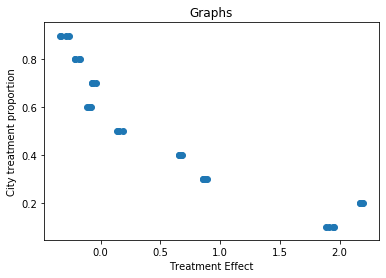

In [170]:
plt.ylabel("City treatment proportion")
plt.xlabel("Treatment Effect")
plt.title("Graphs")
plt.scatter(samples, ts_prop)
plt.show() #for each proportion we have diff TE (they are related to each city)

In [234]:
#b
import statsmodels.formula.api as sm
model = sm.ols(formula="treatment_effect ~ treatment_prop", data=df_ts).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       treatment_effect   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     29.15
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           5.20e-06
Time:                        11:32:40   Log-Likelihood:                -38.470
No. Observations:                  36   AIC:                             80.94
Df Residuals:                      34   BIC:                             84.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3991      0.263      9.

-------

## Problem 1

In [1]:
#beta/sigma = 0.1
# reject at 1% level
#at least 1000 control units
#no more than 3000 control units
#no more than 5000 treatment units

In [4]:
#60%,70%,80%,90% desired power
#ppf(q, loc=0, scale=1) - Percent point function (inverse of cdf — percentiles).
from scipy.stats import norm

p60 = norm.ppf(0.4)
p70 = norm.ppf(0.3)
p80 = norm.ppf(0.2)
p90 = norm.ppf(0.1)

print("Percent point function when power is 60%: " + str(round(p60, 4)))
print("Percent point function when power is 70%: " + str(round(p70, 4)))
print("Percent point function when power is 80%: " + str(round(p80, 4)))
print("Percent point function when power is 90%: " + str(round(p90, 4)))

Percent point function when power is 60%: -0.2533
Percent point function when power is 70%: -0.5244
Percent point function when power is 80%: -0.8416
Percent point function when power is 90%: -1.2816


In [108]:
nt60 = []
nt70 = []
nt80 = []
nt90 = []
b_s = 0.1 # beta/sigma
c_alpha = 2.58 # critical value for 99%
for i in range(1000, 3001):
    x1 = 1/((b_s/(c_alpha - p60))**2-(1/i)) #Calculating nts 
    x2 = 1/((b_s/(c_alpha - p70))**2-(1/i))
    x3 = 1/((b_s/(c_alpha - p80))**2-(1/i))
    x4 = 1/((b_s/(c_alpha - p90))**2-(1/i))
    nt60.append(x1)
    nt70.append(x2)
    nt80.append(x3)
    nt90.append(x4)
nc = list(range(1000, 3001)) 
#Creating DataFrames for each desired power
df60 = pd.DataFrame(list(zip(nc, nt60)), 
               columns =['Control', 'Treatment'])
df70 = pd.DataFrame(list(zip(nc, nt70)), 
               columns =['Control', 'Treatment'])
df80 = pd.DataFrame(list(zip(nc, nt80)), 
               columns =['Control', 'Treatment'])
df90 = pd.DataFrame(list(zip(nc, nt90)), 
               columns =['Control', 'Treatment'])

In [119]:
#Filtering nts: we can have no more than 5000 units for treatment units
df60_filt = df60.loc[(df60.Treatment >= 0) & (df60.Treatment < 5001)]
df70_filt = df70.loc[(df70.Treatment >= 0) & (df70.Treatment < 5001)]
df80_filt = df80.loc[(df80.Treatment >= 0) & (df80.Treatment < 5001)]
df90_filt = df90.loc[(df90.Treatment >= 0) & (df90.Treatment < 5001)]

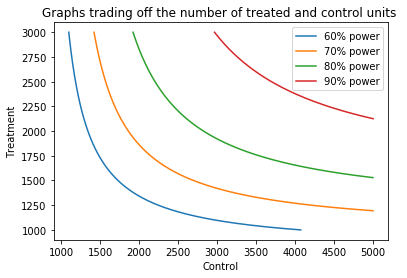

In [120]:
import matplotlib.pyplot as plt
plt.xlabel("Control")
plt.ylabel("Treatment")
plt.title("Graphs trading off the number of treated and control units ")
plt.plot(df60_filt.Treatment, df60_filt.Control, label = '60% power')
plt.plot(df70_filt.Treatment, df70_filt.Control, label = '70% power')
plt.plot(df80_filt.Treatment, df80_filt.Control, label = '80% power')
plt.plot(df90_filt.Treatment, df90_filt.Control, label = '90% power')
plt.legend()
plt.show()